In [129]:
Pkg.add("Convex")
Pkg.add("ECOS")
Pkg.add("PyPlot")
Pkg.update()

INFO: Nothing to be done
INFO: Nothing to be done
INFO: Nothing to be done
INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [136]:
using Convex
using ECOS
using PyPlot

In [138]:
n = 100;
A = rand(n,n);
b = rand(n,1);
x = Variable(n);

x_2norm=Variable(n);

a=0.5;
x_deadzone=Variable(n);
x_logbar=Variable(n);

x_ax=linspace(-1,1);

In [139]:
p = minimize(0.5*sum_squares(A*x-b)+10*norm(x,1))
solve!(p,ECOSSolver());

p = minimize(0.5*sum_squares(A*x_2norm-b)+10*norm(x_2norm,2))
solve!(p,ECOSSolver());

p = minimize(0.5*sum_squares(A*x_deadzone-b)+10*(abs(x_deadzone)-a)
solve!(p,ECOSSolver());

p = minimize(0.5*sum_squares(A*x_logbar-b)+10*(-a^2*log(1-(x_logbar/a)^2))
solve!(p,ECOSSolver());


ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -1.291e+00  +1e+03  9e-01  7e-02  1e+00  6e+00    ---    ---    1  2  - |  -  - 
 1  -2.475e-01  -3.299e-01  +2e+02  4e-01  7e-03  2e-01  8e-01  0.8837  5e-03   1  1  1 |  0  0
 2  +2.616e+00  +2.704e+00  +1e+02  3e-01  6e-03  3e-01  7e-01  0.5070  7e-01   2  2  2 |  0  0
 3  +2.943e+00  +3.033e+00  +1e+02  3e-01  5e-03  3e-01  6e-01  0.1592  2e-01   2  2  2 |  0  0
 4  +2.825e+00  +2.920e+00  +1e+02  2e-01  5e-03  3e-01  6e-01  0.0584  8e-01   2  2  2 |  0  0
 5  +4.221e+00  +4.331e+00  +8e+01  2e-01  3e-03  2e-01  4e-01  0.5352  4e-01   2  2  2 |  0  0
 6  +4.743e+00  +4.859e+00  +8e+01  2e-01  2e-03  2e-01  4e-01  0.0842  7e-01   2  2  2 |  0  0
 7  +3.463e+00  +3.579e+00  +8e+01  1e-01  3e-03  2e-01  4e-01  0.2792  8e-01   2  2  2 |  0  0
 8  +6.284e+00  +6.336e+00  +3e+01  4e-02  8e-

LoadError: syntax: missing comma or ) in argument list
while loading In[139], in expression starting on line 8

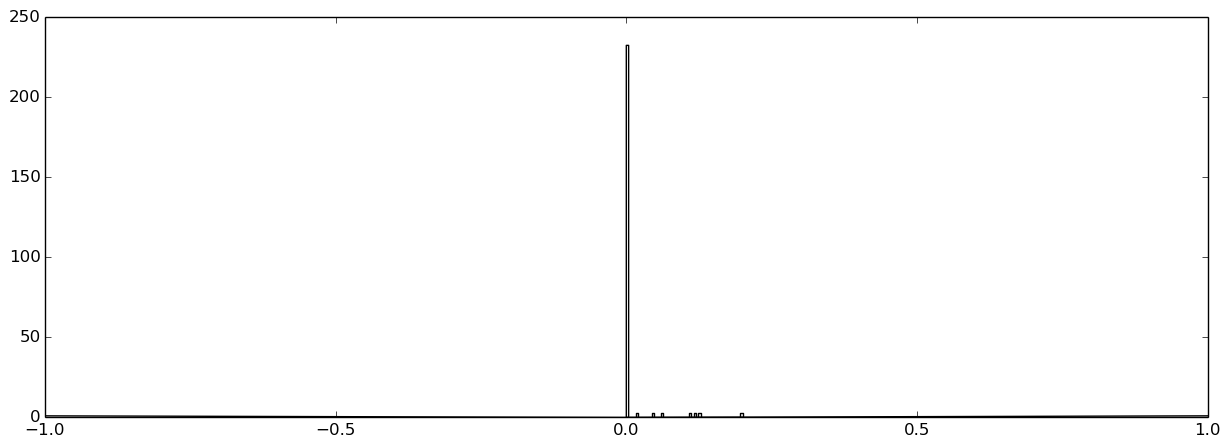

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1549a3a8d0>

In [140]:
nbins=50;
figure(figsize=(15,5))
plt[:hist](x.value,nbins,facecolor="w",normed=1)
#Note I don't how to normalize the historgram in this language. . . 
plot(x_ax,abs(x_ax),"k")

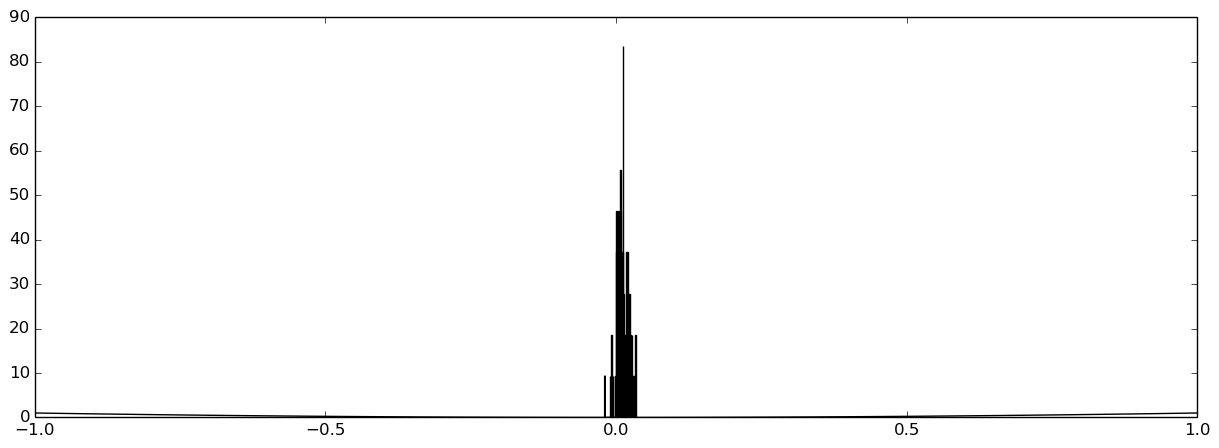

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f15498608d0>

In [141]:
nbins=50;
figure(figsize=(15,5))
plt[:hist](x_2norm.value,nbins,facecolor="w",normed=1)
#Note I don't how to normalize the historgram in this language. . . 
plot(x_ax,(x_ax).^2,"k")

In [149]:
nbins=50;
figure(figsize=(15,5))
plt[:hist](x_deadzone.value,nbins,facecolor="w",normed=1)
#Note I don't how to normalize the historgram in this language. . . 
#I don't know how to plot the dead zone plot here. 
#i would create using in and else statements in matlab but do not know how to do that here. . . 

LoadError: PyError (:PyObject_Call) <type 'exceptions.TypeError'>
TypeError("'NoneType' object has no attribute '__getitem__'",)
  File "/usr/lib/pymodules/python2.7/matplotlib/pyplot.py", line 2827, in hist
    stacked=stacked, **kwargs)
  File "/usr/lib/pymodules/python2.7/matplotlib/axes.py", line 8249, in hist
    if isinstance(x, np.ndarray) or not iterable(x[0]):

while loading In[149], in expression starting on line 3

In [151]:
nbins=50;
figure(figsize=(15,5))
plt[:hist](x_logbar.value,nbins,facecolor="w",normed=1)
#Note I don't how to normalize the historgram in this language. . . 
#I don't know how to plot the log bar here. 
#I also do not know what is going on on these last two graphs. It would appear that something has gone wrong
#with the solving of x_deadzone and x_logbar but I don't know what. . . 

LoadError: PyError (:PyObject_Call) <type 'exceptions.TypeError'>
TypeError("'NoneType' object has no attribute '__getitem__'",)
  File "/usr/lib/pymodules/python2.7/matplotlib/pyplot.py", line 2827, in hist
    stacked=stacked, **kwargs)
  File "/usr/lib/pymodules/python2.7/matplotlib/axes.py", line 8249, in hist
    if isinstance(x, np.ndarray) or not iterable(x[0]):

while loading In[151], in expression starting on line 3